# Суворов Роман ИВТ 2.1
# Прог6 Лабораторная работа №1    

## задание 1.1

статистика по online spend:
максимальное значение: 4556.93
минимальное значение: 320.25
среднее значение: 1905.881
медиана: 1881.940
стандартное отклонение (std): 808.857
дисперсия: 654249.409

статистика по offline spend:
максимальное значение: 5000
минимальное значение: 500
среднее значение: 2843.562
медиана: 3000.000
стандартное отклонение (std): 952.292
дисперсия: 906860.906

общая статистика по marketingSpend.csv:
           Offline       Online
count   365.000000   365.000000
mean   2843.561644  1905.880740
std     952.292448   808.856853
min     500.000000   320.250000
25%    2500.000000  1258.600000
50%    3000.000000  1881.940000
75%    3500.000000  2435.120000
max    5000.000000  4556.930000

информация о датасете marketingSpend.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     365 non-null    object 
 1   Offline  365 non-null  

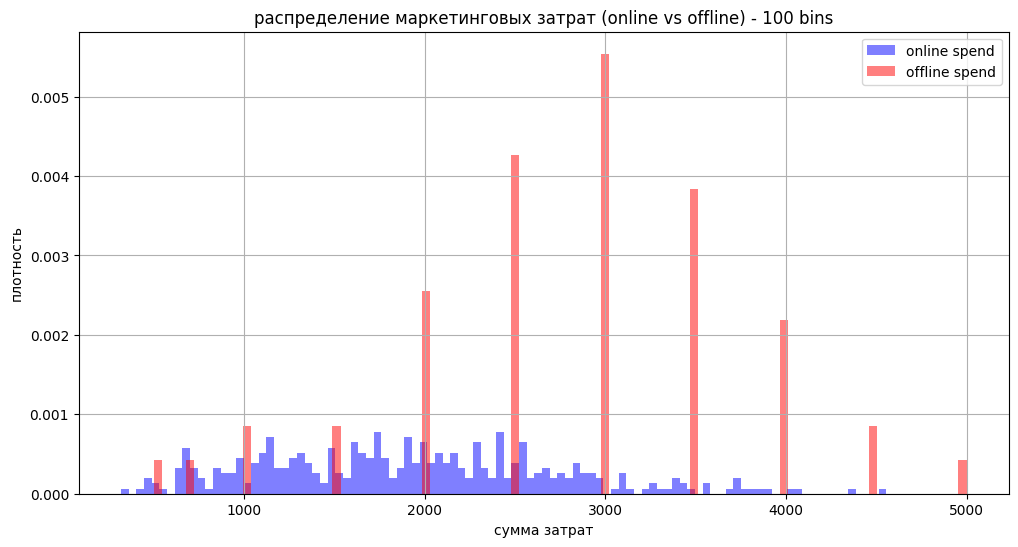

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

marketing_data = pd.read_csv('./code/data/MarketingSpend.csv', header=0, names=['Date', 'Offline', 'Online'])
retail_data = pd.read_csv('./code/data/Retail.csv')

print("статистика по online spend:")
print(f"максимальное значение: {marketing_data['Online'].max()}")
print(f"минимальное значение: {marketing_data['Online'].min()}")
print(f"среднее значение: {marketing_data['Online'].mean():.3f}")
print(f"медиана: {marketing_data['Online'].median():.3f}")
print(f"стандартное отклонение (std): {marketing_data['Online'].std():.3f}")
print(f"дисперсия: {marketing_data['Online'].var():.3f}")

print("\nстатистика по offline spend:")
print(f"максимальное значение: {marketing_data['Offline'].max()}")
print(f"минимальное значение: {marketing_data['Offline'].min()}")
print(f"среднее значение: {marketing_data['Offline'].mean():.3f}")
print(f"медиана: {marketing_data['Offline'].median():.3f}")
print(f"стандартное отклонение (std): {marketing_data['Offline'].std():.3f}")
print(f"дисперсия: {marketing_data['Offline'].var():.3f}")

print("\nобщая статистика по marketingSpend.csv:")
print(marketing_data.describe())

plt.figure(figsize=(12, 6))

marketing_data['Online'].hist(bins=100, alpha=0.5, color='blue', label='online spend', density=True)
marketing_data['Offline'].hist(bins=100, alpha=0.5, color='red', label='offline spend', density=True)

plt.title("распределение маркетинговых затрат (online vs offline) - 100 bins")
plt.xlabel("сумма затрат")
plt.ylabel("плотность")
plt.legend()
plt.grid(True)

print("\nинформация о датасете marketingSpend.csv:")
print(marketing_data.info())

print('-' * 80)

print("\nобщая статистика по retail.csv:")
print(retail_data.describe())

num_invoices = len(retail_data['InvoiceNo'].unique())
print(f"\nколичество уникальных инвойсов: {num_invoices}")

num_stockcodes = len(retail_data['StockCode'].unique())
print(f"количество уникальных товаров (stockCode): {num_stockcodes}")

top_10_stockcodes = retail_data['StockCode'].value_counts().head(10)
print("\nтоп-10 самых заказываемых товаров (stockCode):")
print(top_10_stockcodes)

print('-' * 80)
plt.show()


## задание 1.2

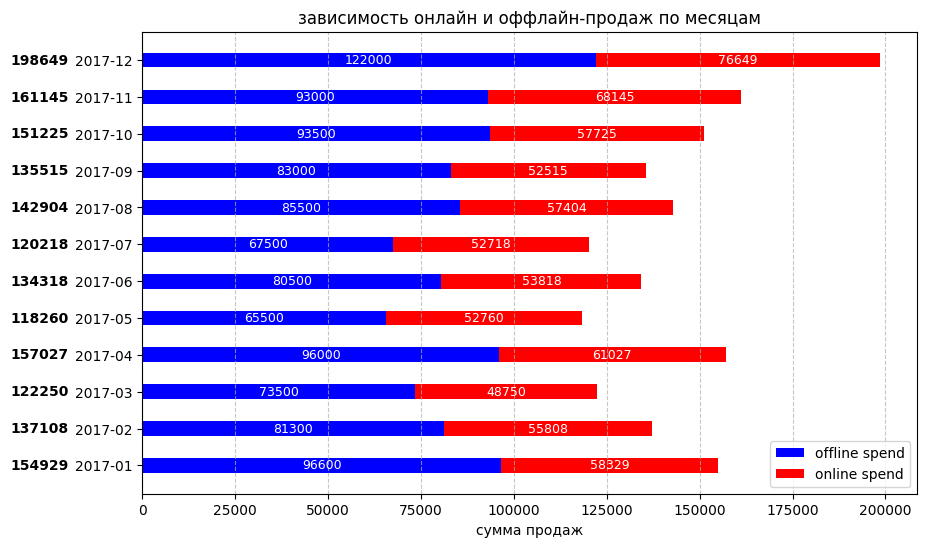

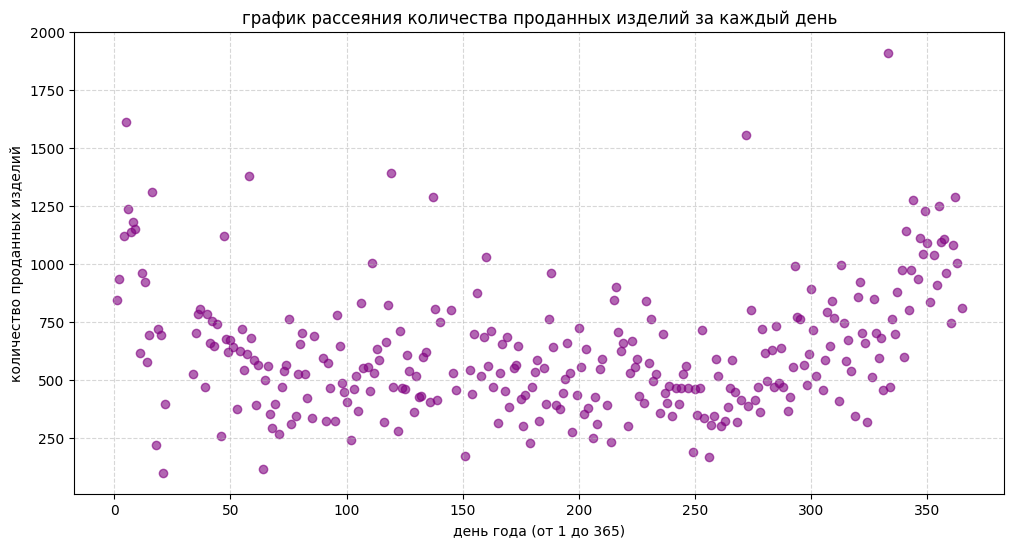

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

marketing_data = pd.read_csv('./code/data/MarketingSpend.csv', header=0, names=['Date', 'Offline', 'Online'], parse_dates=['Date'])
retail_data = pd.read_csv('./code/data/Retail.csv', parse_dates=['InvoiceDate'])

""" 1 graph """

marketing_data['Month'] = marketing_data['Date'].dt.strftime('%Y-%m')
monthly_sales = marketing_data.groupby('Month')[['Offline', 'Online']].sum()

fig, ax = plt.subplots(figsize=(10, 6))
bar_height = 0.4
months = range(len(monthly_sales))

ax.barh(months, monthly_sales['Offline'], height=bar_height, label='offline spend', color='blue')
ax.barh(months, monthly_sales['Online'], height=bar_height, left=monthly_sales['Offline'], label='online spend', color='red')

for i, (offline, online) in enumerate(zip(monthly_sales['Offline'], monthly_sales['Online'])):
    ax.text(offline / 2, i, f'{offline:.0f}', va='center', ha='center', color='white', fontsize=9)
    ax.text(offline + online / 2, i, f'{online:.0f}', va='center', ha='center', color='white', fontsize=9)
    ax.text(-max(monthly_sales['Offline'] + monthly_sales['Online']) * 0.1, i, f'{offline + online:.0f}', va='center', ha='right', color='black', fontsize=10, fontweight='bold')

ax.set_yticks(months)
ax.set_yticklabels(monthly_sales.index)
ax.set_xlabel('сумма продаж')
ax.set_title('зависимость онлайн и оффлайн-продаж по месяцам')
ax.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

""" 2 graph """

daily_sales = retail_data.groupby('InvoiceDate')['StockCode'].count().reset_index()
daily_sales['DayOfYear'] = daily_sales['InvoiceDate'].dt.dayofyear

plt.figure(figsize=(12, 6))
plt.scatter(daily_sales['DayOfYear'], daily_sales['StockCode'], color='purple', alpha=0.6)
plt.xlabel('день года (от 1 до 365)')
plt.ylabel('количество проданных изделий')
plt.title('график рассеяния количества проданных изделий за каждый день')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
